In [0]:
!pip install shap

     |████████████████████████████████| 245kB 4.8MB/s 
  Created wheel for shap: filename=shap-0.30.1-cp36-cp36m-linux_x86_64.whl size=360447 sha256=5c754d51f48d21e322d48620d287321d5ef4939b067ec7712f382d9e081db053
  Stored in directory: /root/.cache/pip/wheels/62/94/5e/feb9af12d63a719a32266a29ca564b4dc37b4755052aca6859
Successfully built shap


In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
import shap
import numpy as np

In [0]:
x_train=np.load("/gdrive/My Drive/periodic_tf/code/experiments/cnn_22_w o_back_subtraction_float_bins/X_train.npy")
x_test=np.load("/gdrive/My Drive/periodic_tf/code/experiments/cnn_22_w o_back_subtraction_float_bins/X_test.npy")
y_test=np.load("/gdrive/My Drive/periodic_tf/code/experiments/cnn_22_w o_back_subtraction_float_bins/y_test.npy")

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
import tensorflow as tf
from six.moves import cPickle
import os
#import multiprocessing

import keras
import keras.backend.tensorflow_backend as K
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Dense, Activation
from keras.layers import Flatten
from keras.engine.topology import Input
from keras.optimizers import Adam
from keras import regularizers
from keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Using TensorFlow backend.


In [0]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(22,24,1)))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation="relu", 
                 #data_format = "channels_first",
                 kernel_regularizer=regularizers.l2(0.01), 
                 #input_shape=(23,24,1),
                 padding='valid',
                 name="conv2d1"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='valid', 
                 #data_format = "channels_first",
                 name="maxpool2d1",
                 strides=(2,2)))
#model.add(Dropout(rate=0.1))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu", 
                 kernel_regularizer=regularizers.l2(0.01),
                 padding='valid', 
                 #data_format = "channels_first",
                 name="conv2d2"))
#model.add(Conv2D(filters=256, kernel_size=(5, 5), activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Flatten(
    #data_format = "channels_first", 
    name="flatten"))
#model.add(Dense(units=512, kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dropout(rate=0.5))
#model.add(Dense(units=512, kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Dense(units=7, activation="softmax", name="preds"))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#model.load_weights('/gdrive/My Drive/workflow/periodic/code/experiments/cnn/model.h5')
model.load_weights('/gdrive/My Drive/periodic_tf/code/experiments/cnn_22_w o_back_subtraction_float_bins/model.h5')
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d1 (Conv2D)             (None, 18, 20, 16)        416       
_________________________________________________________________
maxpool2d1 (MaxPooling2D)    (None, 9, 10, 16)         0         
_________________________________________________________________
conv2d2 (Conv2D)             (None, 5, 6, 64)          25664     
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
preds (Dense)                (None, 7)                 13447     
Total params: 39,527
Trainable params: 39,527
Non-trainable params: 0
_________________________________________________________________


In [0]:
# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 5000, replace=False)]

# explain predictions of the model on four images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test)
#shap_values = e.shap_values(x_test[10:20])

# plot the feature attributions
#shap.image_plot(shap_values, -x_test[10:20])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
shap_values = np.array(shap_values)

In [0]:
shap_values.shape

(7, 9126, 22, 24, 1)

In [0]:
np.save("/gdrive/My Drive/periodic_tf/xai/SHAP_DeepExplainer/shap_values_5k.npy", shap_values)

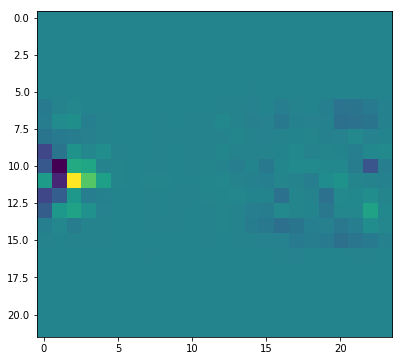

In [0]:
plt.imshow(shap_values[0][256][:,:,0])

In [0]:
shap_values[0][256][:,:,0][:,2]

array([ 0.00000000e+00,  2.32215621e-06, -2.10682302e-07, -1.30521869e-07,
        5.30760417e-06,  1.68471297e-06,  6.06524805e-03,  1.94012001e-02,
       -1.16160177e-02,  2.51420643e-02,  6.71403706e-02,  2.28154004e-01,
        3.42217796e-02,  5.20473160e-02, -1.20426901e-02, -6.26926951e-04,
        2.03171603e-05,  1.06691577e-05,  9.72977318e-07,  1.01298087e-06,
       -1.43626039e-06, -1.87968467e-08])

In [0]:
y_test[10:20]

array([1, 4, 1, 1, 1, 1, 1, 2, 5, 1], dtype=int32)

In [0]:
x_train.shape

(36504, 22, 24, 1)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

shap_values = np.load("/gdrive/My Drive/periodic_tf/xai/SHAP_DeepExplainer/shap_values_5k.npy")
preds = np.load("/gdrive/My Drive/periodic_tf/code/experiments/cnn_22_w o_back_subtraction_float_bins/preds.npy")
prob = np.load("/gdrive/My Drive/periodic_tf/code/experiments/cnn_22_w o_back_subtraction_float_bins/preds_proba.npy")

clss = {1:'EW', 2:'EA', 4:'RRab', 5:'RRc', 6:'RRd', 8:'RSCVn', 13:'LPV'}

plt.rcParams['figure.figsize'] = (18, 6)

for i in range(shap_values.shape[1]):
  plt.figure()
  fig, ax=plt.subplots(1,7)
  im0=ax[0].imshow(shap_values[0][i][:,:,0])
  ax[0].set_title("EW: "+str(prob[i,0]))
  im1=ax[1].imshow(shap_values[1][i][:,:,0])
  ax[1].set_title("EA: "+str(prob[i,1]))
  im2=ax[2].imshow(shap_values[2][i][:,:,0])
  ax[2].set_title("RRab: "+str(prob[i,2]))
  im3=ax[3].imshow(shap_values[3][i][:,:,0])
  ax[3].set_title("RRc: "+str(prob[i,3]))
  im4=ax[4].imshow(shap_values[4][i][:,:,0])
  ax[4].set_title("RRd: "+str(prob[i,4]))
  im5=ax[5].imshow(shap_values[5][i][:,:,0])
  ax[5].set_title("RSCVn: "+str(prob[i,5]))
  im6=ax[6].imshow(shap_values[6][i][:,:,0])
  ax[6].set_title("LPV: "+str(prob[i,6]))
  divider0 = make_axes_locatable(ax[0])
  cax0 = divider0.append_axes("right", size="5%", pad=0.1)
  divider1 = make_axes_locatable(ax[1])
  cax1 = divider1.append_axes("right", size="5%", pad=0.1)
  divider2 = make_axes_locatable(ax[2])
  cax2 = divider2.append_axes("right", size="5%", pad=0.1)
  divider3 = make_axes_locatable(ax[3])
  cax3 = divider3.append_axes("right", size="5%", pad=0.1)
  divider4 = make_axes_locatable(ax[4])
  cax4 = divider4.append_axes("right", size="5%", pad=0.1)      
  divider5 = make_axes_locatable(ax[5])
  cax5 = divider5.append_axes("right", size="5%", pad=0.1)
  divider6 = make_axes_locatable(ax[6])
  cax6 = divider6.append_axes("right", size="5%", pad=0.1)
  fig.colorbar(im0, cax=cax0)
  fig.colorbar(im1, cax=cax1)
  fig.colorbar(im2, cax=cax2)
  fig.colorbar(im3, cax=cax3)
  fig.colorbar(im4, cax=cax4)
  fig.colorbar(im5, cax=cax5)
  fig.colorbar(im6, cax=cax6)
  plt.suptitle("X_test: "+str(i)+" "+"Prediction: "+str(clss[preds[i]]))
  plt.savefig("/gdrive/My Drive/periodic_tf/xai/SHAP_DeepExplainer/test_plots/"+str(i)+".png")
  plt.close()

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os

shap_values = np.load("/gdrive/My Drive/periodic_tf/xai/SHAP_DeepExplainer/shap_values_5k.npy")
preds = np.load("/gdrive/My Drive/periodic_tf/code/experiments/cnn_22_w o_back_subtraction_float_bins/preds.npy")
prob = np.load("/gdrive/My Drive/periodic_tf/code/experiments/cnn_22_w o_back_subtraction_float_bins/preds_proba.npy")

os.mkdir("/gdrive/My Drive/periodic_tf/xai/SHAP_DeepExplainer/shap/")
os.mkdir("/gdrive/My Drive/periodic_tf/xai/SHAP_DeepExplainer/shap/EW/")
os.mkdir("/gdrive/My Drive/periodic_tf/xai/SHAP_DeepExplainer/shap/EA/")
os.mkdir("/gdrive/My Drive/periodic_tf/xai/SHAP_DeepExplainer/shap/RRab/")
os.mkdir("/gdrive/My Drive/periodic_tf/xai/SHAP_DeepExplainer/shap/RRc/")
os.mkdir("/gdrive/My Drive/periodic_tf/xai/SHAP_DeepExplainer/shap/RRd/")
os.mkdir("/gdrive/My Drive/periodic_tf/xai/SHAP_DeepExplainer/shap/RSCVn/")
os.mkdir("/gdrive/My Drive/periodic_tf/xai/SHAP_DeepExplainer/shap/LPV/")

index = {1:0, 2:1, 4:2, 5:3, 6:4, 8:5, 13:6}
clss = {1:'EW', 2:'EA', 4:'RRab', 5:'RRc', 6:'RRd', 8:'RSCVn', 13:'LPV'}

for i in range(10):
  plt.figure()
  plt.imshow(shap_values[index[preds[i]]][i][:,:,0])
  plt.axis("off")
  plt.savefig("/gdrive/My Drive/periodic_tf/xai/SHAP_DeepExplainer/shap/"+clss[preds[i]]+"/"+str(i)+".png", bbox_inches='tight', transparent="True", pad_inches=0)
  plt.close()

In [0]:
import numpy as np
preds = np.load("/gdrive/My Drive/periodic_tf/code/experiments/cnn_22_w o_back_subtraction_float_bins/preds.npy")

In [0]:
np.where(preds==0)

(array([], dtype=int64),)